1.작업형 제1유형

03 주어진 데이터 세트는 아파트 가격 데이터다. 아파트 가격을  결정 하는 10개의 독립변수와 1개의 종속변수가 있다. 각 독립변수의 이상치 를 사분위수를 기준으로 측정하고 이상치가 가장 많은 독립변수의 이상치 개수를 구하시오. 이때 결측치를 먼저 제거한 후 이상치를 구하시오.[단, 이상치는 (1Q-1.5IQR)보다 작거나 (3Q+1.5IQR)보다 큰 값이며, IQR은 Q3에서 Q1을 뺀 값이다.]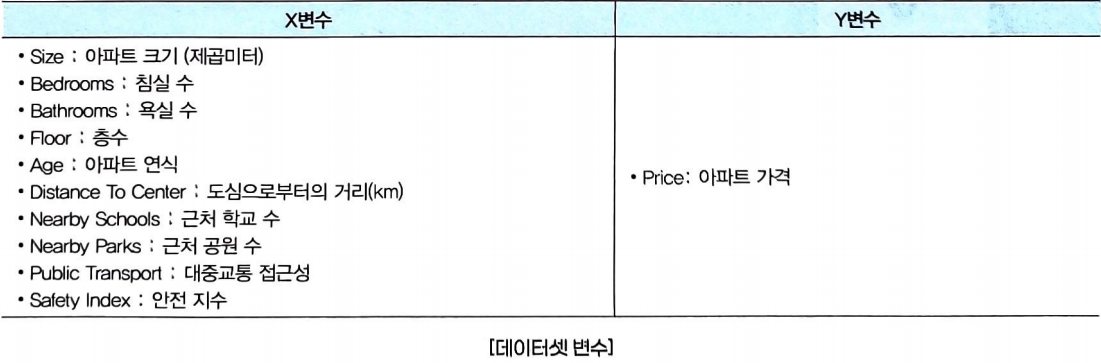

In [7]:
# IQR(InterQuantile Range, 사분위수 범위)
# 제3사분위수와 제1사분위수의 차이 값이다. 사분위수의 범위는 Q3 - Q1이다.

# 데이터 불러오기
import pandas as pd

file = '/content/07.01.03-apartment_prices_dataset.csv'
df = pd.read_csv(file)
# print(df.head())
# print(df.info())
# 전체 데이터는 735건이며 결측치는 없음을 알 수 있다. describe()로 기술통계 값을 보니
# 예를 들어 데이터의 중위수(50%)가 평균보다 지나치게 작은 경우 왼쪽으로 치우치며 오른쪽으로
# 꼬리가 긴 데이터 분포를 보이는 것을 알 수 있다. 이를 긍정 왜도(Positive Skewness)라고
# 표현하면 꼬리가 길면 길수록 비대칭도가 커져서 왜도의 절댓값이 증가하게 된다.
# 이런 작업을 거쳐서 데이터에 대한 이해도를 높일 수 있다. 아울러 머신러닝 모델링 시에
# 스케일링의 방법 등 데이터 전처리 방법도 선택할 수가 있다.
# print(df.describe())

# 문제에서 따라 먼저 결측치를 제거하는 코드를 작성하자.
df1 = df.dropna()
# df1.info()

# 아래 코드로 모든 변수를 대상으로 이상치를 구할 수 있다. 이때 효율성을 높이기 위해서
# for문으로 loop를 돌리며 결과치를 딕셔너리 자료형으로 만들겠다.
# 이상치 구하기
cols = df1.columns[:-1]
# print(cols)
o_cnt_per_var = {}

for c in cols:
    Q1, Q3 = df1[c].quantile([0.25, 0.75])  # 제1사분위수와 제3사분위수를 Q1과 Q3에 할당
    IQR = Q3 - Q1   # IQR 구하기
    # 아래코드는 문제에서 주어진 이상치 조건에 대입해서 그 이상치의 합을 o_cnt에 저장
    o_cnt = (((df1[c] < Q1-1.5 * IQR)) | (df1[c] > (Q3 + 1.5 * IQR))).sum()
    # o_cnt_per_var 딕셔너리에 o_cnt 값을 저장
    o_cnt_per_var[c] = o_cnt
# 이상치를 구하여 확인을 해보니 'Age' 컬럼이 15로 가장 많이 있다.
# print(o_cnt_per_var)

# 문제는 이상치가 가장 많은 변수를 구하는 것이다. 따라서 값을 기준으로 하여
# 이상치 max 값과 변수 이름인 키 값을 찾아서 제출하면 된다.
# 이상치가 가장 많은 변수 구하기
result = max(o_cnt_per_var, key=o_cnt_per_var.get)
print(result)





Age
